
## Image classification 

In [1]:
import torchvision
from torchvision import transforms 
import torch.utils.data as data
import torch.nn as nn
import torch


In [2]:
train_data_path = 'data/train'

In [3]:
tfs = transforms.Compose([
 transforms.Resize(64),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225] )
 ])

train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=tfs)

In [4]:
val_data_path = 'data/validation'
test_data = torchvision.datasets.ImageFolder(root=val_data_path, transform=transforms)

In [5]:
batch_size = 64
train_data_loader = data.DataLoader(train_data, batch_size=batch_size)
# val_data_loader = data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = data.DataLoader(test_data, batch_size=batch_size)

In [ ]:
len(train_data_loader)

In [7]:
class SimpleNet(nn.Module):
    
    def __init__(self):
    
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2*3*65*85, 84)
        self.fc2 = nn.Linear(84, 50)
        self.fc3 = nn.Linear(50,2)
    
    def forward(self):
        
        x = x.view(-1, 2*3*65*85)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x


In [8]:
simplenet = SimpleNet()


In [9]:
import torch.optim as optim 
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [10]:
# training model

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device='cpu'):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()

        for batch in train_loader:
            optimizer.zero_grad()
            inputs, target = batch
            inputs = inputs.to(device)
            target = target.to(device)
            output = model(inputs)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item()
        training_loss /= len(train_iterator)
        model.eval()
        num_correct = 0
        noptimizerum_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets)
            valid_loss += loss.data.item()
            correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],
            target).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(valid_iterator)
        print('Epoch: {}, Training Loss: {:.2f},Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,valid_loss, num_correct / num_examples))

In [11]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


train(simplenet, optimizer, torch.nn.CrossEntropyLoss(),train_data_loader, test_data_loader,device =torch.device("cpu"))

TypeError: forward() takes 1 positional argument but 2 were given

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [101]:
transform = transforms.Compose(
    [transforms.Resize(256),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root='./data/train',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='./data/validation',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('ng', 'ok')

In [102]:
len(trainloader.dataset[0][0][0][0])

341

In [103]:
len(trainset[0][0][0][0])

341

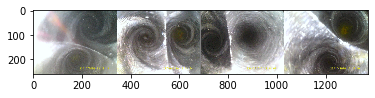

   ok    ng    ng    ng


In [104]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [114]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(80032, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        # super(Net, self).__init__()
        # self.fc1 = nn.Linear(64*85*3, 84)
        # self.fc2 = nn.Linear(84, 50)
        # self.fc3 = nn.Linear(50,2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 80032)
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        # x = x.view(-1, 64*85*3)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        # return x


net = Net()

In [115]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [117]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print('Finished Training')

torch.Size([4, 80032])
[1,     1] loss: 0.000
torch.Size([4, 80032])
[1,     2] loss: 0.000
torch.Size([4, 80032])
[1,     3] loss: 0.000
torch.Size([4, 80032])
[1,     4] loss: 0.000
torch.Size([4, 80032])
[1,     5] loss: 0.000
torch.Size([4, 80032])
[1,     6] loss: 0.000
torch.Size([4, 80032])
[1,     7] loss: 0.001
torch.Size([4, 80032])
[1,     8] loss: 0.000
torch.Size([4, 80032])
[1,     9] loss: 0.000
torch.Size([4, 80032])
[1,    10] loss: 0.000
torch.Size([4, 80032])
[1,    11] loss: 0.000
torch.Size([4, 80032])
[1,    12] loss: 0.000
torch.Size([4, 80032])
[1,    13] loss: 0.000
torch.Size([4, 80032])
[1,    14] loss: 0.000
torch.Size([4, 80032])
[1,    15] loss: 0.000
torch.Size([4, 80032])
[1,    16] loss: 0.000
torch.Size([4, 80032])
[1,    17] loss: 0.000
torch.Size([4, 80032])
[1,    18] loss: 0.000
torch.Size([4, 80032])
[1,    19] loss: 0.000
torch.Size([4, 80032])
[1,    20] loss: 0.000
torch.Size([4, 80032])
[1,    21] loss: 0.000
torch.Size([4, 80032])
[1,    22] 

In [118]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

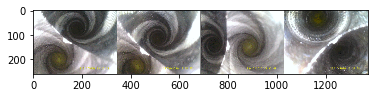

GroundTruth:     ng    ng    ng    ng


In [119]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [120]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


torch.Size([4, 80032])
Predicted:     ok    ok    ok    ok


In [121]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        print(f'label : {labels} , output {outputs}')
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

torch.Size([4, 80032])
label : tensor([0, 0, 0, 0]) , output tensor([[-0.5460,  0.5565],
        [-0.5084,  0.5263],
        [-0.3937,  0.4064],
        [-0.4052,  0.4126]])
torch.Size([4, 80032])
label : tensor([0, 0, 1, 1]) , output tensor([[-0.4101,  0.4290],
        [-0.3440,  0.3576],
        [-0.4707,  0.4695],
        [-0.5027,  0.5103]])
torch.Size([4, 80032])
label : tensor([1, 1, 1, 1]) , output tensor([[-0.5706,  0.5829],
        [-0.6271,  0.6321],
        [-0.6341,  0.6426],
        [-0.6446,  0.6466]])
torch.Size([4, 80032])
label : tensor([1, 1, 1, 1]) , output tensor([[-0.5889,  0.5994],
        [-0.3707,  0.3892],
        [-0.4540,  0.4680],
        [-0.5002,  0.5169]])
torch.Size([4, 80032])
label : tensor([1, 1, 1, 1]) , output tensor([[-0.4114,  0.4268],
        [-0.6470,  0.6527],
        [-0.5292,  0.5487],
        [-0.5249,  0.5444]])
Accuracy of the network on the test images: 70 %


In [122]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

torch.Size([4, 80032])
torch.Size([4, 80032])
torch.Size([4, 80032])
torch.Size([4, 80032])
torch.Size([4, 80032])
Accuracy of    ng :  0 %
Accuracy of    ok : 100 %
